## Assignment Set 2: ANNs and CNNs
---
> COMPILED BY NAKACWA OLIVIA  20/U/0080

## Question 1: Artificial Neural Networks (Topics: ANN architecture, Activation functions)

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense, Input

In [ ]:
# Load data
data = pd.read_csv('Heart.csv')

In [ ]:
# Checking the first five columns
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Checking empty columns
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# Checking the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df = pd.DataFrame(data)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
# Create feature matrix and target vector
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# View train data
print(X_train)

[[ 45.   1.  66. ...   1.   0. 230.]
 [ 82.   1. 855. ...   0.   0.  30.]
 [ 70.   1.  59. ...   0.   0.  85.]
 ...
 [ 85.   1. 102. ...   0.   0.  94.]
 [ 60.   0. 582. ...   1.   1.  40.]
 [ 70.   1. 171. ...   1.   1. 146.]]


In [ ]:
# View train data
print(y_train)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1
 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 1 0]


In [ ]:
# # Create a simple artificial neural network with one hidden layer
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LSTM

#Instantiating the model
model = Sequential()

# Adding layers to the model
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Checking the shape of X
X.shape

(299, 12)

In [ ]:
# Train the model on the generated data
history = model.fit(X, y, epochs=100, verbose=0, batch_size=32)

In [ ]:
history.history

{'loss': [0.7249692678451538,
  0.6813122630119324,
  0.6657065153121948,
  0.6654859781265259,
  0.6740546822547913,
  0.6777842044830322,
  0.6837149262428284,
  0.677440881729126,
  0.6657852530479431,
  0.661763072013855,
  0.6555622220039368,
  0.6687713265419006,
  0.6628989577293396,
  0.6605639457702637,
  0.6634138822555542,
  0.675055205821991,
  0.6619507074356079,
  0.6567316651344299,
  0.6489536166191101,
  0.6609126329421997,
  0.6577006578445435,
  0.6556732058525085,
  0.6561088562011719,
  0.660723865032196,
  0.6380105018615723,
  0.6514025926589966,
  0.6418059468269348,
  0.6377490162849426,
  0.6427192091941833,
  0.6593773365020752,
  0.6469884514808655,
  0.6505781412124634,
  0.6325603723526001,
  0.6375385522842407,
  0.6395674347877502,
  0.6443369388580322,
  0.6407017707824707,
  0.6277918219566345,
  0.6450260281562805,
  0.6668874025344849,
  0.6463509202003479,
  0.6421710848808289,
  0.6416921019554138,
  0.6392311453819275,
  0.6387221813201904,
  0.64

In [ ]:
# Evaluate the model on the generated data
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

10/10 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.6789
Loss: 0.6304, Accuracy: 0.6789


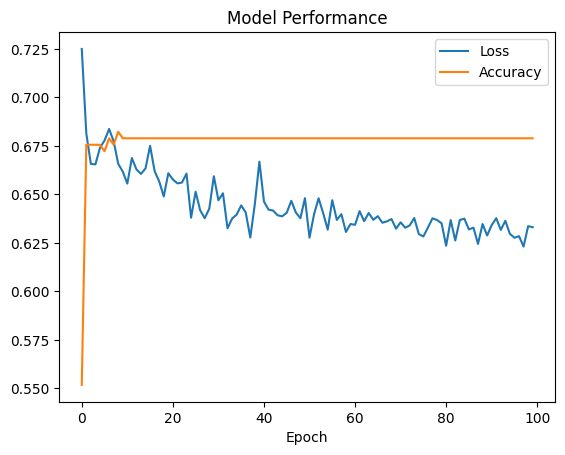

In [ ]:
# Plot the loss and accuracy over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'])
plt.show()

#### Impact of hyperparameters on the model
*   Increasing the number of hidden layers allow the model to learn more complex representations and capture intricate patterns in the data.
*   Increasing the number of neurons can enhance the model's ability to fit the training data more accurately.
*   Different activation functions such as ReLU, sigmoid, or tanh have different characteristics and can affect the model's ability to capture and propagate gradients during training.
*   Finding an appropriate learning rate through experimentation or using adaptive learning rate techniques (e.g., learning rate schedules, adaptive optimizers) is crucial for effective training.

## Question 2: Convolutional Neural Networks (Topics: CNN architecture, Image Classification)

In [ ]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Defining class labels
class_labels = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'
]

In [ ]:
# Checking the shape of the train data
X_train[0].shape

(28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# define row and column of figure
rows, columns = 5, 10

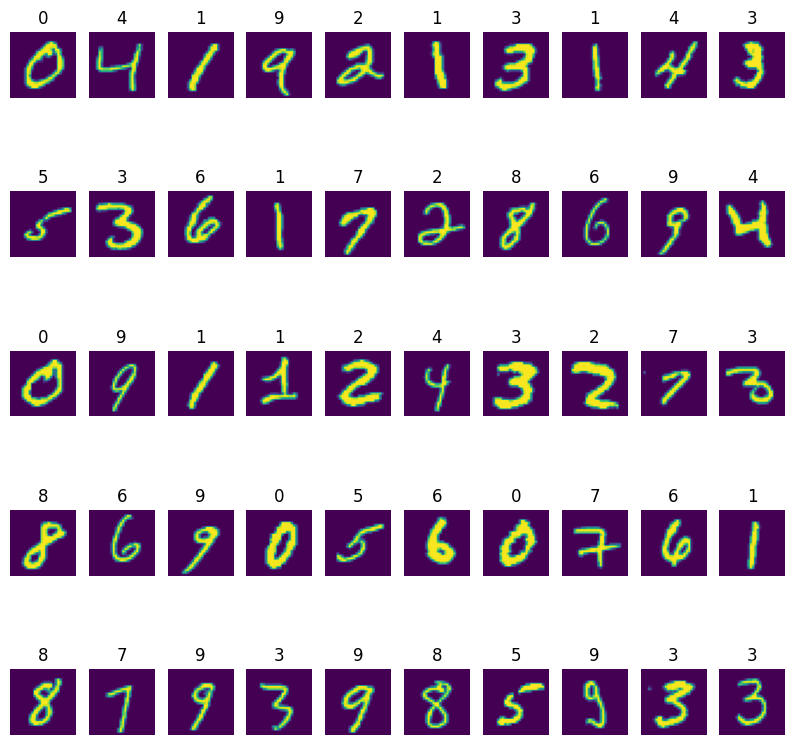

In [ ]:
# Define figure
fig = plt.figure(figsize=(10, 10))

# Display random images with labels
for i in range(1, columns*rows +1):
    image = X_train[i]
    label = y_train[i]
    class_name = class_labels[label]

    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.title(class_name)
    plt.axis('off')

plt.show()

In [ ]:
X_train.max()

255

In [ ]:
X_train.min()

0

In [ ]:
# Preprocess the data by scaling it between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Converting the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

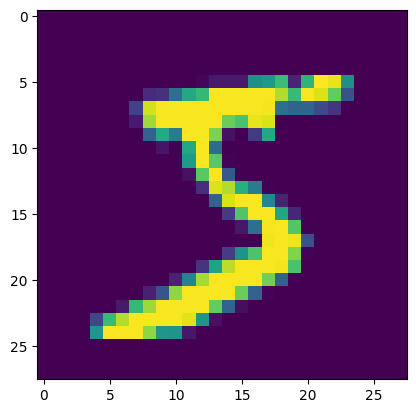

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# Defining our CNN model
model = Sequential() # initialize a sequential model object

# Adding the first convolutional layer with 32 filters, a 3x3 kernel size, and ReLU activation function
# Set the input shape to (32, 32, 3)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Adding a max pooling layer with pool size (2, 2) to reduce the spatial dimensions by half
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a dropout layer with a rate of 0.25 to help prevent overfitting
model.add(Dropout(0.25))

# Adding a second convolutional layer with 64 filters and a 3x3 kernel size
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Adding another max pooling layer with pool size (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding another dropout layer with a rate of 0.25
model.add(Dropout(0.25))

# Flatten the output from the convolutional layers to a 1D array for the dense layers
model.add(Flatten())

# Add a fully connected dense layer with 256 units and ReLU activation function
model.add(Dense(256, activation='relu'))

# Add another dropout layer with a rate of 0.5
model.add(Dropout(0.5))

# Add the final dense layer with 10 units for the 10 classes in CIFAR-10, and a softmax activation function for probability scores
model.add(Dense(10, activation='softmax'))


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
# Training the model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
938/938 [==============================] - 78s 82ms/step - loss: 0.2320 - accuracy: 0.9276 - val_loss: 0.0513 - val_accuracy: 0.9831
Epoch 2/10
938/938 [==============================] - 73s 78ms/step - loss: 0.0855 - accuracy: 0.9736 - val_loss: 0.0430 - val_accuracy: 0.9859
Epoch 3/10
938/938 [==============================] - 74s 79ms/step - loss: 0.0633 - accuracy: 0.9801 - val_loss: 0.0285 - val_accuracy: 0.9912
Epoch 4/10
938/938 [==============================] - 75s 80ms/step - loss: 0.0534 - accuracy: 0.9831 - val_loss: 0.0272 - val_accuracy: 0.9901
Epoch 5/10
938/938 [==============================] - 73s 78ms/step - loss: 0.0482 - accuracy: 0.9855 - val_loss: 0.0228 - val_accuracy: 0.9927
Epoch 6/10
938/938 [==============================] - 74s 79ms/step - loss: 0.0424 - accuracy: 0.9865 - val_loss: 0.0232 - val_accuracy: 0.9920
Epoch 7/10
938/938 [==============================] - 73s 78ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0221 - val_accuracy:

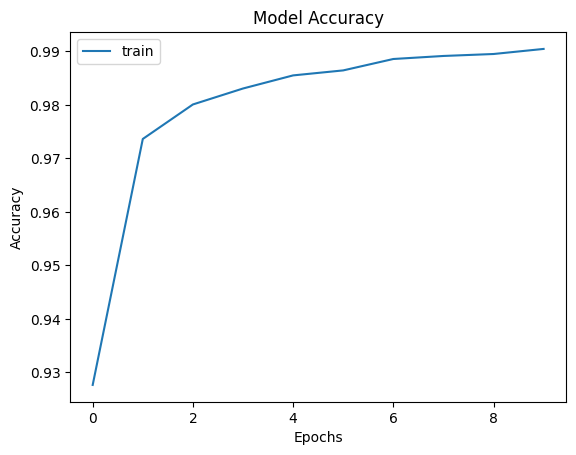

In [ ]:
import matplotlib.pyplot as plt
# Displaying the accuracy curve
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'], loc = 'upper left')
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.0237 - accuracy: 0.9929
Test loss: 0.02366466633975506
Test accuracy: 0.992900013923645


In [ ]:
# Evaluating the performance
from sklearn.metrics import classification_report, confusion_matrix
prob = model.predict(X_test)
pred = np.argmax(prob, axis=1)
predictions = to_categorical(pred)
print(classification_report(y_test,predictions,target_names= class_labels))

313/313 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



##### Changing the number of filters and kernel size

In [ ]:
# Defining our CNN model
model_0 = Sequential() # initialize a sequential model object

# Adding the first convolutional layer with 32 filters, a 3x3 kernel size, and ReLU activation function
# Set the input shape to (32, 32, 3)
model_0.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Adding a max pooling layer with pool size (2, 2) to reduce the spatial dimensions by half
model_0.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a dropout layer with a rate of 0.25 to help prevent overfitting
model_0.add(Dropout(0.25))

# Adding a second convolutional layer with 64 filters and a 3x3 kernel size
model_0.add(Conv2D(64, kernel_size=(4, 4), activation='relu'))

# Adding another max pooling layer with pool size (2, 2)
model_0.add(MaxPooling2D(pool_size=(2, 2)))

# Adding another dropout layer with a rate of 0.25
model_0.add(Dropout(0.25))

# Flatten the output from the convolutional layers to a 1D array for the dense layers
model_0.add(Flatten())

# Add a fully connected dense layer with 256 units and ReLU activation function
model_0.add(Dense(256, activation='relu'))

# Add another dropout layer with a rate of 0.5
model_0.add(Dropout(0.5))

# Add the final dense layer with 10 units for the 10 classes in CIFAR-10, and a softmax activation function for probability scores
model_0.add(Dense(10, activation='softmax'))


In [ ]:
# Compiling the model
model_0.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
# Training the model
history = model_0.fit(X_train, y_train, batch_size=64, epochs=1, validation_data=(X_test, y_test))

938/938 [==============================] - 89s 94ms/step - loss: 0.2212 - accuracy: 0.9317 - val_loss: 0.0485 - val_accuracy: 0.9845


In [ ]:
history.history

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model_0.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0485 - accuracy: 0.9845
Test loss: 0.04846150055527687
Test accuracy: 0.984499990940094


### Impact of hyperparameters on the model

*   Increasing the number of filters can allow the model to learn more complex patterns, and as well increases the model's computational requirements.
*   Experimenting with different kernel sizes can help find the right balance for the specific task.
*   Finding an appropriate learning rate through experimentation, or using adaptive learning rate techniques, can help improve performance.
*   Experimenting with the depth of the network can help find the optimal balance between capacity and generalization.



## Model Card for question 2

In [ ]:
%%shell
update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 3
curl -O https://bootstrap.pypa.io/get-pip.py
python get-pip.py

update-alternatives: error: alternative path /usr/bin/python3.8 doesn't exist
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2544k  100 2544k    0     0  8045k      0 --:--:-- --:--:-- --:--:-- 8052k
  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/50/c2/e06851e8cc28dcad7c155f4753da8833ac06a5c704c109313b8d5a62968a/pip-23.2.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!mkdir /usr/local/lib/python3.8/dist-packages/google
!ln -s /usr/local/lib/python3.10/dist-packages/google/colab /usr/local/lib/python3.8/dist-packages/google/colab

mkdir: cannot create directory ‘/usr/local/lib/python3.8/dist-packages/google’: No such file or directory
ln: failed to create symbolic link '/usr/local/lib/python3.8/dist-packages/google/colab': No such file or directory


In [ ]:
# !pip install -U seaborn scikit-learn model-card-toolkit
!pip install model_card_toolkit

  Using cached model_card_toolkit-2.0.0-py3-none-any.whl (68 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached jsonschema-3.2.0-py2.py3-none-any.whl (56 kB)
INFO: pip is looking at multiple versions of model-card-toolkit to determine which version is compatible with other requirements. This could take a while.
  Using cached model_card_toolkit-1.3.2-py3-none-any.whl (79 kB)
  Using cached model_card_toolkit-1.3.1-py3-none-any.whl (79 kB)
  Using cached Jinja2-2.11.3-py2.py3-none-any.whl (125 kB)
  Using cached model_card_toolkit-1.3.0-py3-none-any.whl (74 kB)
  Using cached model_card_toolkit-1.2.0-py3-none-any.whl (67 kB)
  Using cached absl_py-0.10.0-py3-none-any.whl (127 kB)
  Using cached model_card_toolkit-1.1.0-py3-none-any.whl (57 kB)
  Using cached model_card_toolkit-1.0.0-py3-none-any.whl (57 kB)
  Using cached model_card_toolkit-0.1.3-py3-none-any.whl (43 kB)
INFO: pip is still looking at multiple versions of model-card-toolkit to determine which versi

In [ ]:
# Import neccessary libraries
from datetime import date
from io import BytesIO
from IPython import display
import model_card_toolkit as mctlib
import base64
import uuid

#Create instance of model card toolkit class
mct = mctlib.ModelCardToolkit()

#Create basic model template
model_card = mct.scaffold_assets()

In [ ]:
# Annotate information into model card
model_card.model_details.name = 'Number Classifier'
model_card.model_details.overview = (
    'This model analyzed in this card classifies handwritten or printed numerical digits into their respective categories 0-9. It uses a deep learning architecture to learn patterns and features from input images of digits and make predictions based on the learned knowledge.')
model_card.model_details.owners = [
    mctlib.Owner(name= 'Olivia Nakacwa Kwagala', contact='lvkwagala@gmail.com')
]
model_card.model_details.references = [
    mctlib.Reference(reference='https://www.kaggle.com/code/var0101/model-cards'),
    mctlib.Reference(reference='https://modelcards.withgoogle.com/about'),
    mctlib.Reference(reference='https://arxiv.org/abs/1810.03993')
]
model_card.model_details.version.name = str(uuid.uuid4())
model_card.model_details.version.date = str(date.today())

model_card.model_details.details = (["Input: Number images"],
['Output: This model can detect 1000+ images of numbers and for each image, it displays the category, label description and confidence level/accuracy.'],
['Model Architecture: It was built using CNN specifically TensorFlow with 3  layers, RelU activation function, and Adam optimizer. It was trained with batch size 64, learning rate 0.001, and 20 epochs.'])

model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('The model could be used to discriminate against certain groups of people. It is important to use the model responsibly.')
)]
model_card.considerations.limitations = [mctlib.Limitation(description='The model is not perfect and can sometimes make mistakes. It is also not able to classify digits that are not well-formed.')]
# model_card.considerations.limitations = [mctlib.Limitation(description='The model is trained on images of numbers in the range of 0 to 9. It may not provide accurate results for numbers outside this range.')]
model_card.considerations.use_cases = [mctlib.UseCase(description='The Number Classifier model is intended to be used as a tool for automated digit recognition tasks. It can be deployed in applications such as optical character recognition (OCR), automatic number plate recognition (ANPR), and any other system that requires digit classification.')]
model_card.considerations.users = [mctlib.User(description='Banks and financial institutions personnel'), mctlib.User(description='ML researchers'), mctlib.User(description='OCR software developers')]

model_card.quantitative_analysis.graphics.description = (
  'Acuracy curve')
model_card.quantitative_analysis.graphics.collection = [
    mctlib.Graphic(image=history.history['accuracy']),
]

mct.update_model_card(model_card)

In [ ]:
# Return the model card document as an HTML page
card = mct.export_format()

display.display(display.HTML(card))